## Step 0: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Exploratory Data Analysis (EDA)

In [2]:
# Dataset URL
# Dataset is from: https://fred.stlouisfed.org/series/SPDYNLE00INUSA 
dataset_url = "./LifeExpectancy.csv"

# Load the dataset
df = pd.read_csv(dataset_url)

# Display the first few rows of the dataset
df.head()

# Check the shape of the dataset
print("Dataset Shape:", df.shape)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Check data types
print("\nData Types:\n", df.dtypes)

Dataset Shape: (63, 2)

Missing Values:
 DATE              0
SPDYNLE00INUSA    0
dtype: int64

Summary Statistics:
        SPDYNLE00INUSA
count       63.000000
mean        74.906930
std          2.963327
min         69.770732
25%         72.730488
50%         75.365854
75%         77.460976
max         78.841463

Data Types:
 DATE               object
SPDYNLE00INUSA    float64
dtype: object


## Step 2: Data Cleaning and Preprocessing

In [3]:
# Handle missing values (if any)
df = df.dropna()

# Convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract year from the DATE column
df['YEAR'] = df['DATE'].dt.year

# Drop the original DATE column
df = df.drop(columns=['DATE'])

# Rename 'SPDYNLE00INUSA' to 'life expectancy'
df.rename(columns={'SPDYNLE00INUSA': 'life expectancy'}, inplace=True)

# Display the cleaned dataset
df.head()

,life expectancy,YEAR
0,69.770732,1960
1,70.270732,1961
2,70.119512,1962
3,69.917073,1963
4,70.165854,1964


## Step 3: Data Visualization 

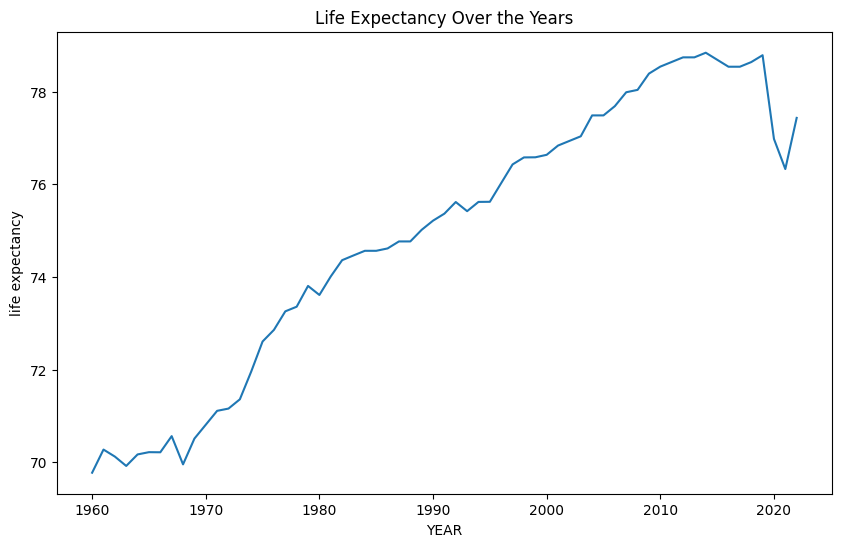

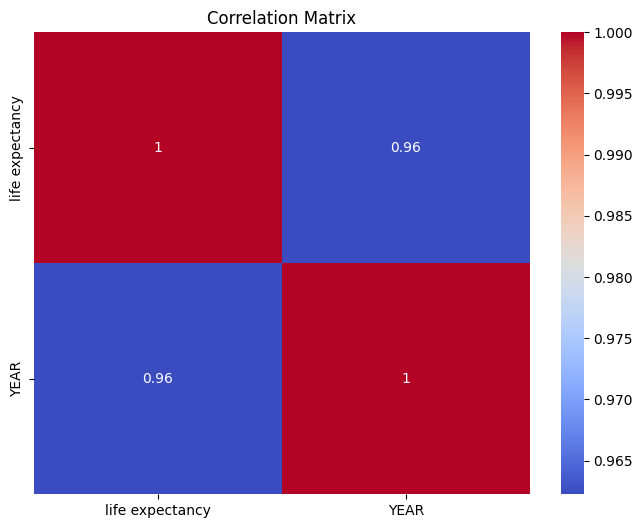

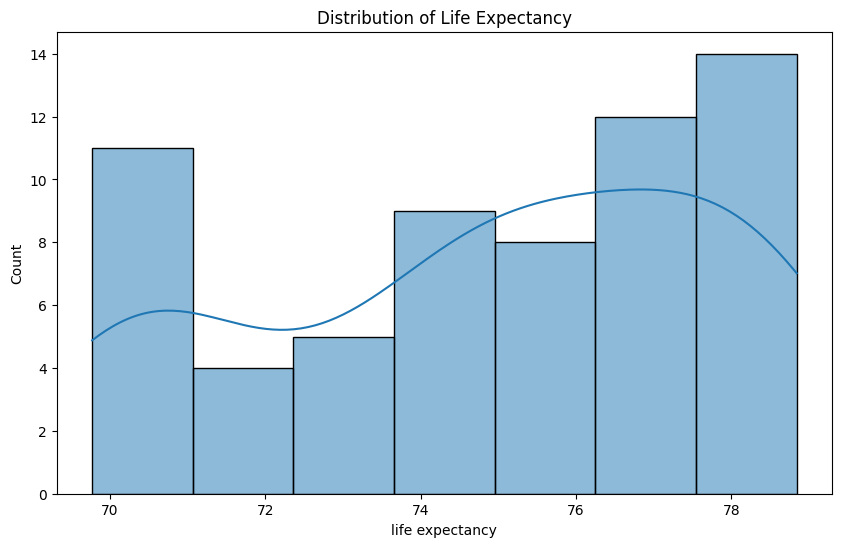

In [4]:
# Visualize the trend of Life Expectancy over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='life expectancy', data=df)
plt.title('Life Expectancy Over the Years')
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['life expectancy'], kde=True)
plt.title('Distribution of Life Expectancy')
plt.show()

## Step 4: Model Development

Predicted life expectancy in 2200: 41.34 years


c:\Users\justi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


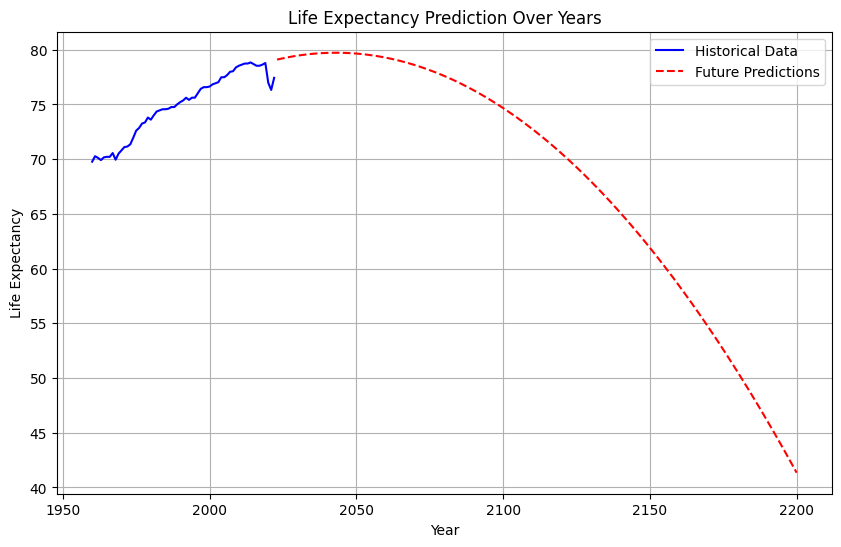

In [5]:
# Define features and target variable
X = df[['YEAR']]
y = df['life expectancy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    if name == "Linear Regression":
        # Use polynomial features for Linear Regression
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

# Display the results
# Define and train the linear model
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

# Plotting the predictions for future years
future_year = int(input("Enter a year to predict life expectancy: "))
future_years = np.arange(2023, future_year + 1).reshape(-1, 1)
future_years_poly = poly.transform(scaler.transform(future_years))
future_predictions = linear_model.predict(future_years_poly)

# Print life expectancy for the entered year
life_expectancy = future_predictions[-1]
print(f"Predicted life expectancy in {future_year}: {life_expectancy:.2f} years")

# Plot actual data and future predictions
plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], df['life expectancy'], label="Historical Data", color='blue')
plt.plot(future_years, future_predictions, label="Future Predictions", color='red', linestyle='--')
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Prediction Over Years")
plt.legend()
plt.grid()
plt.show()


## Step 5: Model Evaluation

In [6]:
# Display the performance of each model
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R2: {metrics['R2']:.4f}")
    print()

# Check if any model meets the performance criteria (R2 >= 0.85)
best_model = None
best_r2 = -np.inf

for name, metrics in results.items():
    if metrics['R2'] > best_r2:
        best_r2 = metrics['R2']
        best_model = name

if best_r2 >= 0.85:
    print(f"The best model is {best_model} with R2 score of {best_r2:.4f}, which meets the performance criteria.")
else:
    print("None of the models meet the performance criteria of R2 >= 0.85.")

Linear Regression:
  MSE: 0.9611
  R2: 0.9018

Decision Tree:
  MSE: 0.4162
  R2: 0.9575

Random Forest:
  MSE: 0.4160
  R2: 0.9575

Support Vector Machine:
  MSE: 0.4085
  R2: 0.9583

The best model is Support Vector Machine with R2 score of 0.9583, which meets the performance criteria.


## Step 6: Documentation

# Documentation
# Life Expectancy Prediction 

## 1. Libraries
The following libraries are imported for this project:

- **`pandas`** for data manipulation and analysis.
- **`numpy`** for numerical operations.
- **`matplotlib.pyplot`** for data visualization.
- **`seaborn`** for enhanced data visualization.
- **`sklearn.model_selection.train_test_split`** for splitting the data into training and testing sets.
- **`sklearn.preprocessing.StandardScaler`** for standardizing the features.
- **`sklearn.preprocessing.PolynomialFeatures`** for creating polynomial features.
- **`sklearn.linear_model.LinearRegression`** for linear regression modeling.
- **`sklearn.tree.DecisionTreeRegressor`** for decision tree regression modeling.
- **`sklearn.ensemble.RandomForestRegressor`** for random forest regression modeling.
- **`sklearn.svm.SVR`** for support vector machine regression modeling.
- **`sklearn.metrics.mean_squared_error`** for calculating the mean squared error.
- **`sklearn.metrics.r2_score`** for calculating the R-squared score.

## 2. Load and Check Data
This section covers data import and basic inspection:

- The dataset is from this url: https://fred.stlouisfed.org/series/SPDYNLE00INUSA
- The dataset is loaded from a CSV file located at `./LifeExpectancy.csv`.
- The first few rows of the dataset are displayed using `df.head()` to get a quick overview.
- The shape of the dataset is checked using `df.shape` to understand the number of rows and columns.
- Missing values are checked using `df.isnull().sum()` to see if any data cleaning is necessary.
- Summary statistics of the dataset are displayed using `df.describe()`, showing mean, median, standard deviation, etc.
- Data types of the columns are checked using `df.dtypes` to ensure they align with expected data types for modeling.

## 3. Clean and Prepare
To prepare the data for analysis and modeling:

- Missing values are handled by dropping rows with missing values using `df.dropna()`.
- The `DATE` column is converted to datetime format with `pd.to_datetime()` for time-based analysis.
- The `YEAR` column is extracted from the `DATE` column using `df['DATE'].dt.year` for trend analysis.
- The original `DATE` column is dropped using `df.drop(columns=['DATE'])` to focus only on essential data points.
- The cleaned dataset is displayed using `df.head()` to confirm changes.

## 4. Exploring Data
This step involves analyzing trends, correlations, and distributions in the data:

- The trend of `SPDYNLE00INUSA` (life expectancy) over the years is visualized using a line plot with `sns.lineplot()` to observe changes over time.
- A correlation matrix is created and visualized using a heatmap with `sns.heatmap()` to identify relationships between variables.
- The distribution of the target variable `SPDYNLE00INUSA` is visualized using a histogram with `sns.histplot()` to check for skewness or outliers.

## 5. Set Up Features and Split Data
To create the features for modeling:

- The feature `YEAR` is selected as the independent variable `X`.
- The target variable `SPDYNLE00INUSA` is selected as `y`.
- The data is split into training and testing sets using `train_test_split()` to evaluate model performance.
- The features are standardized using `StandardScaler()` to normalize the data and improve model performance.
- Polynomial features are created for the training and testing sets using `PolynomialFeatures()` to capture non-linear patterns.

## 6. Model Training & Results
Four regression models are initialized and evaluated:

- Four models are initialized: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`, and `SVR`.
- The `LinearRegression` model is trained using polynomial features, while the other models are trained as usual.
- Each model is evaluated using Mean Squared Error (MSE) and R-squared (R2) scores to measure accuracy.
- The results are stored in a dictionary and displayed for easy comparison.

## 7. Best Model Check
To determine the best-performing model:

- The best model is determined based on the highest R2 score.
- If the best model's R2 score is greater than or equal to 0.85, it is considered to meet the performance criteria.
- The best model and its R2 score are printed, along with relevant metrics for comparison.

## 8. Summary
This project encompasses a complete workflow for life expectancy prediction:

- **Data Preparation**: The dataset is loaded, cleaned, and prepared for analysis.
- **Exploration and Visualization**: Key trends and patterns in life expectancy are visualized, providing insight into the data.
- **Model Training and Evaluation**: Various regression models are tested, and their performances are compared based on accuracy metrics.
- **Future Prediction**: The best model is used to predict future life expectancy, with projections visualized alongside historical data for clear trend analysis.